 programs on feed forward netwoprk to classify any standard dataset available in the public domain

In [ ]:
import keras
from keras.layers import Dense
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

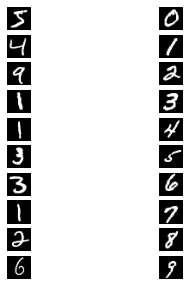

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys_r')
  plt.axis('off')
plt.show()

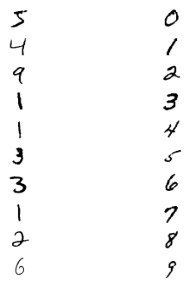

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('off')
plt.show()

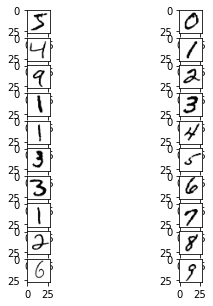

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('on')
plt.show()

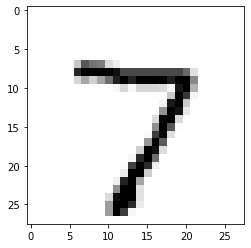

In [ ]:
plt.imshow(x_valid[0],cmap='Greys')

In [ ]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')

In [ ]:
x_train/=255
x_valid/=255
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
from keras import utils as np_utils
n_classes=10

y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_valid[3]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [ ]:
y_valid[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model=Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=150,verbose=1)

Epoch 1/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.0992
Epoch 2/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.0992
Epoch 3/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.0992
Epoch 4/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0908 - accuracy: 0.0992
Epoch 5/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0906 - accuracy: 0.0992
Epoch 6/150
469/469 [==============================] - 2s 4ms/step - loss: 0.0905 - accuracy: 0.1000
Epoch 7/150
469/469 [==============================] - 2s 5ms/step - loss: 0.0904 - accuracy: 0.1022
Epoch 8/150
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.1022
Epoch 9/150
469/469 [==============================] - 2s 4ms/step - loss: 0.0902 - accuracy: 0.1022
Epoch 10/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0902 - accura

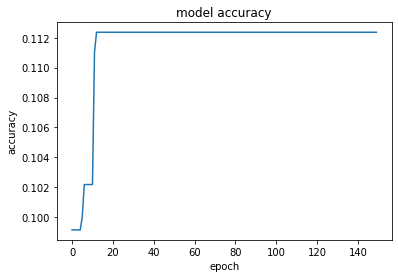

In [ ]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

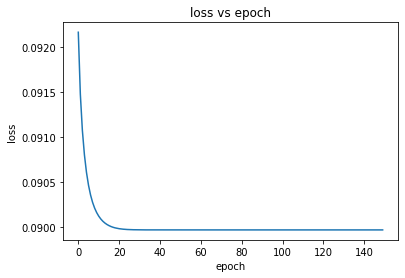

In [ ]:
plt.plot(history.history['loss'])

plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()